**Goal**: Implement a custom Gymnasium environment and use Stable Baselines 3 and Q-learning to solve it.

### Import

In [1]:
import os
import pickle

import gymnasium as gym
import numpy as np
from gymnasium.spaces import Box, Discrete
from matplotlib import pyplot as plt
from stable_baselines3 import PPO
from tqdm import tqdm

### Subtract coin environment

In [2]:
# Reach zero with discrete steps
class Subtract_coin(gym.Env):
    def __init__(self):
        # The number of coins we can choose
        self.action_space = Discrete(3)
        self.coin_values = np.array([1, 0.1, 0.01], dtype=np.float32)

        # Amount left to pay
        self.observation_space = Box(-1, 10)

    def reset(self, seed=None, amount_to_pay=None):
        super().reset(seed=seed)
        rng = self.np_random

        # Start state initialisation
        if amount_to_pay == None:
            self.amount_to_pay = rng.uniform(low=0.01, high=10)
        else:
            self.amount_to_pay = np.float32(amount_to_pay)

        observation = np.array([self.amount_to_pay])
        info = {}

        # Logging
        self.action_taken = []
        self.orignal_amount_to_pay = self.amount_to_pay

        return observation, info

    def step(self, action):
        # Log action
        self.action_taken.append(action)

        # Update observation
        self.amount_to_pay -= self.coin_values[action]
        observation = np.array([self.amount_to_pay])

        # Reward
        reward = -1

        # If found gold
        if np.round(observation[0], 3) <= 0.01 and np.round(observation[0], 3) >= -0.01:
            reward = 100

        # Terminate condition
        if np.round(observation[0], 3) <=  0.01:
            terminated = True
        else:
            terminated = False

        info = {}

        return observation, reward, terminated, False, info

    def show(self):
        print(f"{self.orignal_amount_to_pay}", end="")
        coin_values_string = ["1", "0.1", "0.01"]
        for action in self.action_taken:
            amount = coin_values_string[action]
            print(f"-" + amount, end="")
        print(f" = {self.amount_to_pay}")

### Test - untrained model

In [3]:
# Test environment
env = Subtract_coin()

episodes = 5
for episode in range(1, episodes+1):
    obs, _  = env.reset()
    score = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        score += reward
    print(f"Epsiode {episode}")
    env.show()
    print(f"Score:{score}")
    print("-----------------------------")

Epsiode 1
9.260543559850117-0.1-0.1-0.1-0.01-0.1-0.1-0.01-0.01-1-1-0.01-0.01-0.1-0.01-1-1-0.01-1-1-0.01-1-0.01-0.1-0.1-1-0.1-0.1-1 = -0.8294564530393878
Score:-28
-----------------------------
Epsiode 2
5.590254644112071-0.1-1-0.1-1-1-0.01-0.01-1-0.1-0.01-0.01-0.01-0.1-0.01-0.1-0.1-0.1-1 = -0.16974536497763726
Score:-18
-----------------------------
Epsiode 3
5.780556751320084-0.01-0.01-0.1-1-0.1-1-1-1-0.1-0.1-0.1-1-0.1-0.01-0.1-0.1 = -0.04944325993029253
Score:-16
-----------------------------
Epsiode 4
2.5540564919137725-0.1-0.1-0.01-0.1-0.01-0.01-0.1-1-1-1 = -0.8759435133761397
Score:-10
-----------------------------
Epsiode 5
3.473232517362491-0.01-1-0.1-1-0.01-0.01-0.1-0.01-0.1-1-1 = -0.8667674862137877
Score:-11
-----------------------------


In [6]:
# Test model for statistics
env = Subtract_coin()

episodes = 10000
total_rewards = []

for episode in tqdm(range(1, episodes+1)):
    obs, _  = env.reset(seed = episode+1)
    score = 0
    terminated = False
    truncated = False

    while not terminated or truncated:
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        score += reward
    total_rewards.append(score)
fail_rate = str(total_rewards).count("-") / len(total_rewards)

total_rewards = np.array(total_rewards)
print(f"The mean reward is {np.mean(total_rewards)} and the standard deviation is {np.std(total_rewards)}.")
print(f"The failure rate is {fail_rate}.")

100%|██████████| 10000/10000 [00:01<00:00, 9509.52it/s]

The mean reward is -9.7715 and the standard deviation is 23.17628718647575.
The failure rate is 0.9525.


(array([  21.,  969., 4969., 3566.,    0.,    0.,    0.,   15.,  184.,
         276.]),
 array([-58. , -42.2, -26.4, -10.6,   5.2,  21. ,  36.8,  52.6,  68.4,
         84.2, 100. ]),
 <BarContainer object of 10 artists>)

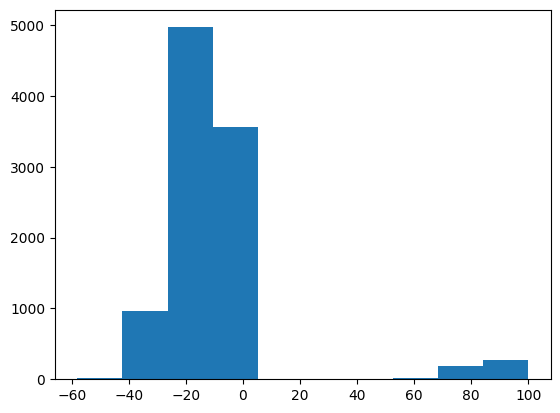

In [7]:
plt.hist(total_rewards)

### Solve problem with DRL using Stable baselines PPO

**Task**: Based on code in 2_Stable_baselines, solve this environment with PPO

### Test - trained model - PPO

**Task**: Test the trained model

**Question**: The trained agent fails sometimes. By exploring the fail cases, do you have a guess why?

### Solve problem with RL using Q-learning

**Question**: How many state bins should there be?

**Task**: Based on code in 0_Q_learning, solve this environment with Q-learning 

### Test - trained model - Q-learning

**Task**: Test the trained model